# Reescale tree to a height of 1 for OU model

In [1]:
# Imports
import numpy as np
import pandas as pd
from skbio import TreeNode
import matplotlib.pyplot as plt

Load tree

In [2]:
tree = TreeNode.read('../phylogeny/place/fine_all.nwk')
tree.count(tips = True)

5380

Histogram of tip-to-tip distances

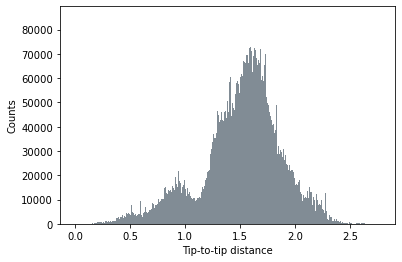

In [3]:
plt.figure()
plt.hist(tree.tip_tip_distances().condensed_form(),  density = False, bins = 'auto',
        color = '#4c5c68', edgecolor = None, alpha = 0.7)
plt.ylabel('Counts')
plt.xlabel('Tip-to-tip distance')
plt.show()

In [4]:
branch_lens = []
for node in tree.postorder(include_self = True):
    branch_lens.append(node.length)

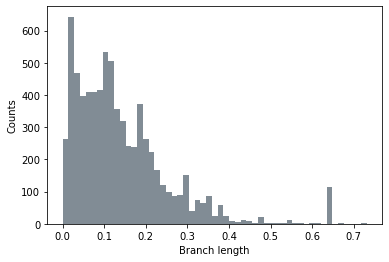

In [5]:
plt.figure()
plt.hist(branch_lens,  density = False, bins = 'auto',
        color = '#4c5c68', edgecolor = None, alpha = 0.7)
plt.ylabel('Counts')
plt.xlabel('Branch length')
plt.show()

In [6]:
root_dist = []
rt = tree.root()
for node in tree.postorder(include_self = False):
    root_dist.append(node.distance(rt))
    #print(f'Node: {node.name}, length: {node.length}, length-to-root: {node.distance(rt)}\n')

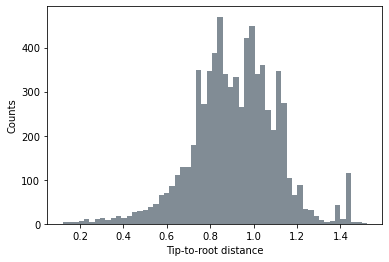

In [7]:
plt.figure()
plt.hist(root_dist,  density = False, bins = 'auto',
        color = '#4c5c68', edgecolor = None, alpha = 0.7)
plt.ylabel('Counts')
plt.xlabel('Tip-to-root distance')
plt.show()

Reescale tree

In [8]:
tree_rescale = tree.copy()

In [9]:
max_dist = max(root_dist)

In [10]:
for node in tree_rescale.postorder():
    node.length = node.length / max_dist

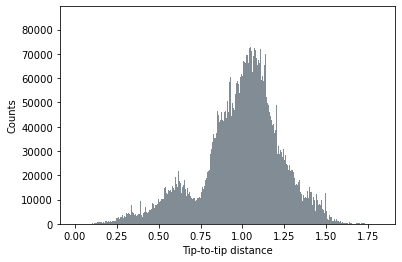

In [11]:
plt.figure()
plt.hist(tree_rescale.tip_tip_distances().condensed_form(),  density = False, bins = 'auto',
        color = '#4c5c68', edgecolor = None, alpha = 0.7)
plt.ylabel('Counts')
plt.xlabel('Tip-to-tip distance')
plt.show()

In [12]:
branch_lens = []
for node in tree_rescale.postorder(include_self = True):
    branch_lens.append(node.length)

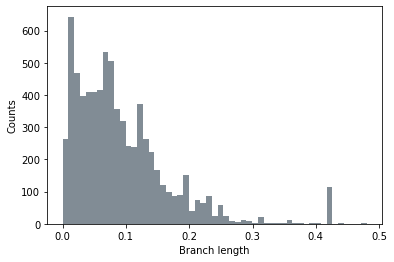

In [13]:
plt.figure()
plt.hist(branch_lens,  density = False, bins = 'auto',
        color = '#4c5c68', edgecolor = None, alpha = 0.7)
plt.ylabel('Counts')
plt.xlabel('Branch length')
plt.show()

In [14]:
root_dist = []
rt = tree_rescale.root()
for node in tree_rescale.postorder(include_self = False):
    root_dist.append(node.distance(rt))

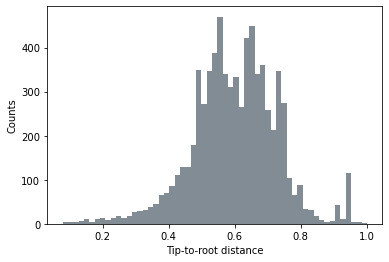

In [15]:
plt.figure()
plt.hist(root_dist,  density = False, bins = 'auto',
        color = '#4c5c68', edgecolor = None, alpha = 0.7)
plt.ylabel('Counts')
plt.xlabel('Tip-to-root distance')
plt.show()

Save rescaled tree

In [16]:
tree_rescale.write('../phylogeny/place/fine_all_rescaled.nwk')

'../phylogeny/place/fine_all_rescaled.nwk'